In [1]:
import matplotlib.pyplot as plt
from loader import load_image
import torch
import torch.nn.functional as F

**Ejercicio 4**. Aplicar el filtro de Sobel en la imagen ad-benneton.jpg. Obtener
las máscaras de contornos a partir de:

In [49]:
# Definir filtros de Sobel
sobel_x = torch.tensor([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]],
                        dtype=torch.float32).unsqueeze(0).unsqueeze(0)

sobel_y = torch.tensor([[ 1,  2,  1],
                        [ 0,  0,  0],
                        [-1, -2, -1]],
                        dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Aplicar el filtro de convolución
def apply_sobel_filter(image, kernel):
    return F.conv2d(image, kernel, padding=1)

image = load_image("ad-benneton.jpg")

grad_x = apply_sobel_filter(image, sobel_x)
grad_y = apply_sobel_filter(image, sobel_y)
grad = torch.sqrt(grad_x ** 2 + grad_y ** 2)

def plot_comparison(img, grad, grad_x, grad_y, binary_grad):
    # Visualizar resultados
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 5, 1)
    plt.title('Imagen Original')
    plt.imshow(img.squeeze(), cmap='gray')

    plt.subplot(1, 5, 2)
    plt.title('Modulo de los gradientes')
    plt.imshow(grad.squeeze().detach().numpy(), cmap='gray')

    plt.subplot(1, 5, 3)
    plt.title('Filtro Sobel Horizontal')
    plt.imshow(grad_x.squeeze().detach().numpy(), cmap='gray')

    plt.subplot(1, 5, 4)
    plt.title('Filtro Sobel Vertical')
    plt.imshow(grad_y.squeeze().detach().numpy(), cmap='gray')

    plt.subplot(1, 5, 5)
    plt.title('Modulo del gradiente binarizado')
    plt.imshow(binary_grad.squeeze().detach().numpy(), cmap='gray')

    plt.show()


• Binarizar el módulo del gradiente obtenido conservando los valores del gradiente superiores al 90% del máximo gradiente.

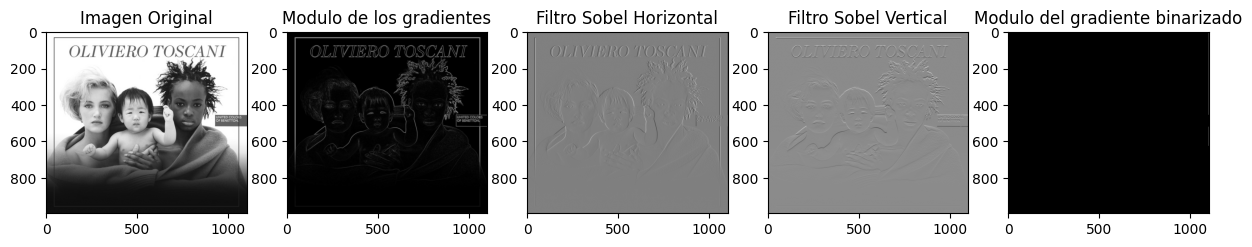

In [50]:
plot_comparison(image, grad, grad_x, grad_y, 
                binary_grad=(grad > 0.9 * grad.max()).float())

• Binarizar conservando los valores de gradiente superiores al 75% del máximo
gradiente

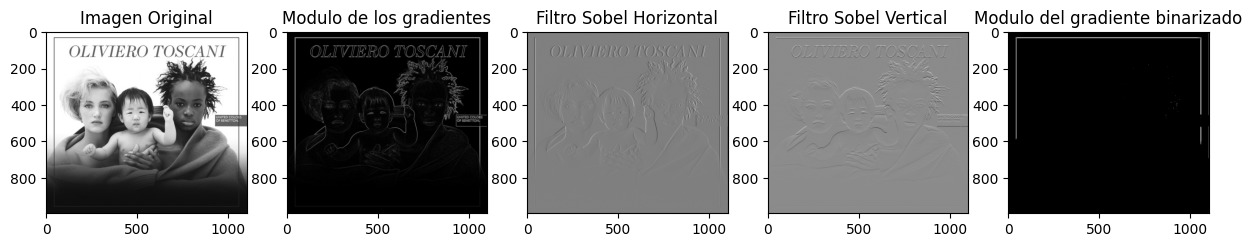

In [51]:
plot_comparison(image, grad, grad_x, grad_y, 
                binary_grad=(grad > 0.75 * grad.max()).float())

• Binarizar eligiendo el umbral a partir de ordenar los valores de gradiente
y quedarse con el 5% de los pixeles de mayor valor

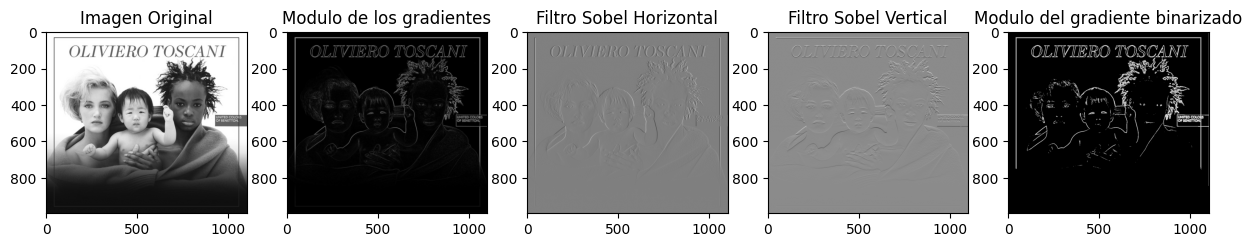

In [53]:
sorted_grad_values, indices = torch.sort(grad.reshape(-1), 
                                         descending=True)
highest_5p_grad_values = torch.unique(
    sorted_grad_values[:int(0.05*len(sorted_grad_values))]
)
plot_comparison(
    image, grad, grad_x, grad_y, 
    binary_grad=(grad > highest_5p_grad_values.min()).float()
)

• Binarizar eligiendo el umbral a partir de ordenar los valores de gradiente
y quedarse con el 25% de los pixeles de mayor valor.

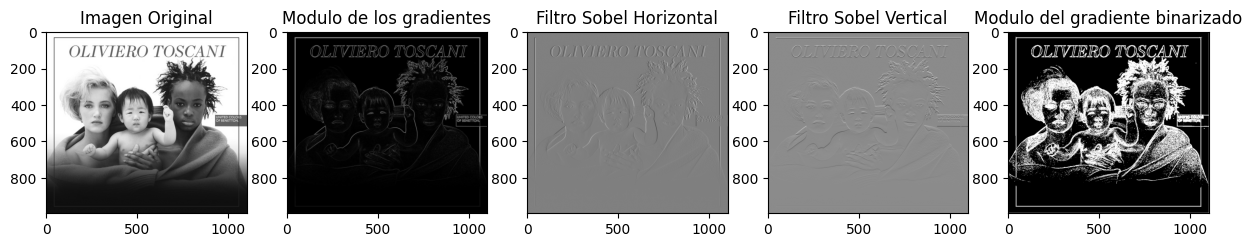

In [54]:
sorted_grad_values, indices = torch.sort(grad.reshape(-1), 
                                         descending=True)
highest_25p_grad_values = torch.unique(
    sorted_grad_values[:int(0.25*len(sorted_grad_values))]
)
plot_comparison(
    image, grad, grad_x, grad_y, 
    binary_grad=(grad > highest_25p_grad_values.min()).float()
)